In [1]:
# Agris Pudāns, st. apl. nr. ap08426

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


warnings.filterwarnings('ignore')

/kaggle/input/iris-data/Iris_validate.csv
/kaggle/input/iris-data/Iris_train.csv


In [2]:
for dirname, _, filenames in os.walk('../input/'):
    for f in filenames:
        print(os.path.join(dirname,f))

../input/iris-data/Iris_validate.csv
../input/iris-data/Iris_train.csv


## DATU IELĀDE UN SAGATAVOŠANA


Treniņa datu ievade

In [3]:
# Treniņa datu ievade
train_data = pd.read_csv('../input/iris-data/Iris_train.csv')
print("Treniņa datu izmērs:", train_data.shape)

Treniņa datu izmērs: (126, 5)


Datu struktūras pārbaude. 

In [4]:
# Datu struktūras pārbaude
print("\nDatu apraksts:")
print(train_data.describe())


Datu apraksts:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     126.000000    126.000000     126.000000    126.000000
mean        5.884921      3.053968       3.792063      1.196825
std         0.847308      0.440118       1.790937      0.761991
min         4.300000      2.000000       1.000000      0.100000
25%         5.125000      2.800000       1.525000      0.300000
50%         5.800000      3.000000       4.450000      1.400000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


Sugu sadalījums

In [5]:
# Sugu sadalījums
print("\nSugu sadalījums treniņa datos:")
print(train_data['Species'].value_counts())


Sugu sadalījums treniņa datos:
Species
Iris-setosa        42
Iris-versicolor    42
Iris-virginica     42
Name: count, dtype: int64


## DATU VIZUALIZĀCIJA

Text(0.5, 1.0, 'Ziedlapu garuma un platuma attiecība')

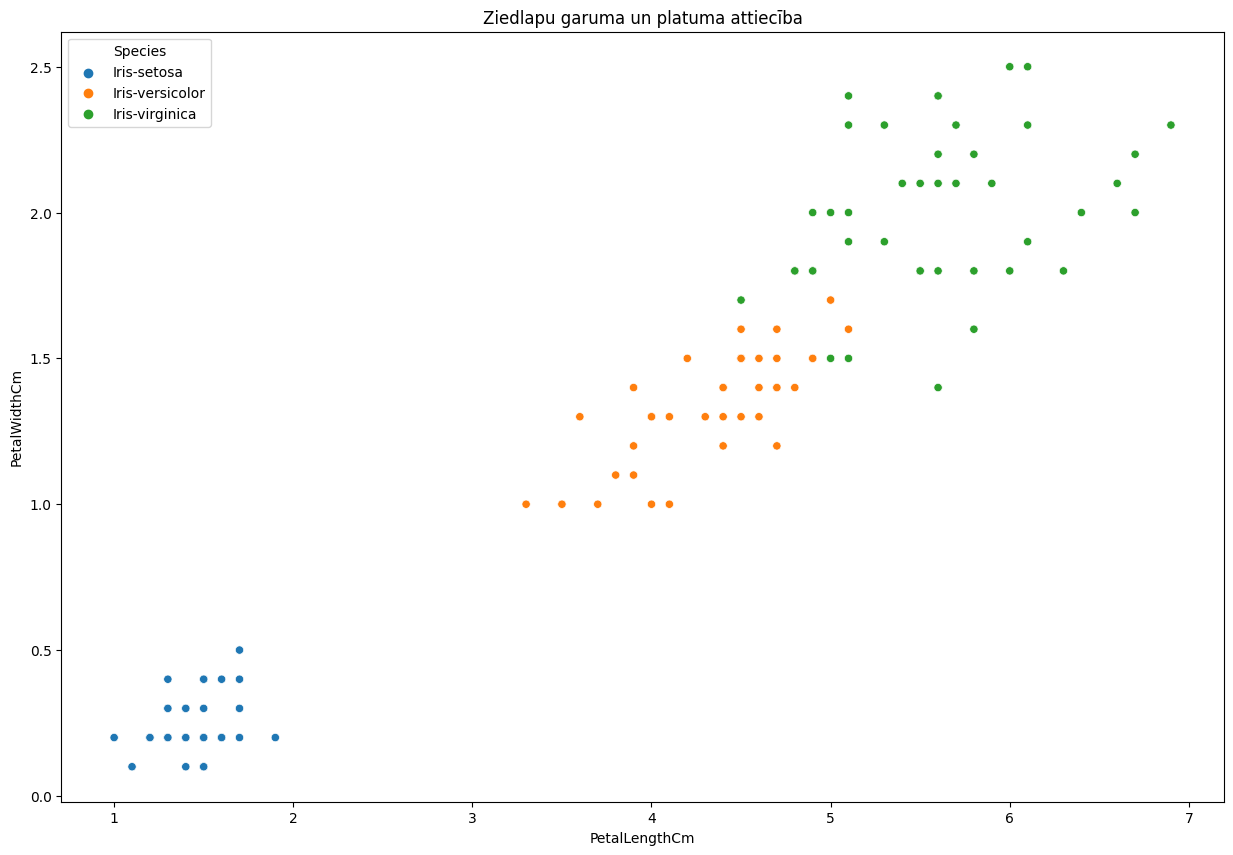

In [6]:
# Vizualizējam datus, lai labāk izprastu īpašību attiecības
plt.figure(figsize=(15, 10))

# Izkliedes diagramma (Ziedlapu garuma un platuma attiecība)
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=train_data)
plt.title('Ziedlapu garuma un platuma attiecība')

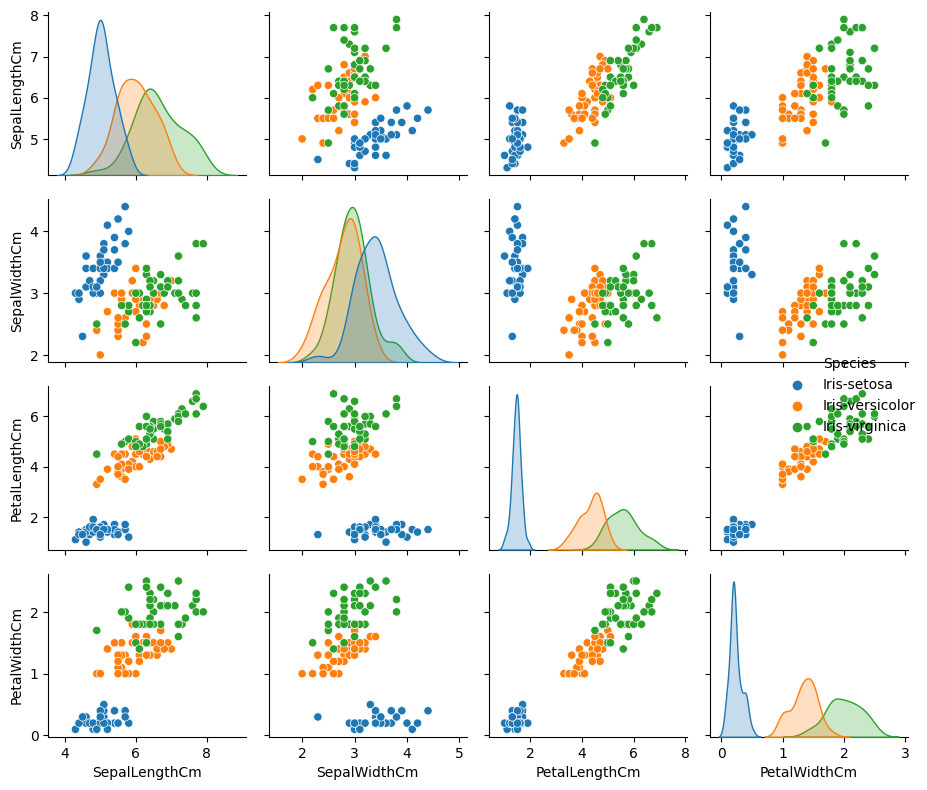

In [7]:
# Pāru izkliedes diagramma
sns.pairplot(train_data, hue='Species', height=2)
plt.tight_layout()

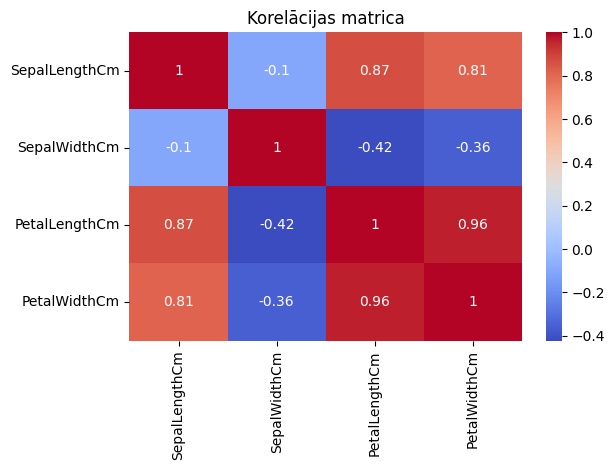

In [8]:
# Korelācijas matrica
corr = train_data.drop('Species', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelācijas matrica')

plt.tight_layout()
plt.savefig('iris-vi.png') 

## DATU SAGATAVOŠANA MODELIM

In [9]:
# Datu sagatavošana modelim
# Atdalām pazīmes un mērķi 
X_train = train_data.drop('Species', axis=1).values
y_train = train_data['Species'].values

# Kodējam mērķa mainīgo (sugas) skaitliskās vērtībās
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Standartizējam pazīmes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Pārveidojam mērķa mainīgo uz "one-hot" vektoru 
# Mums ir 3 klases (Iris-setosa, Iris-versicolor, Iris-virginica)
y_train_onehot = keras.utils.to_categorical(y_train_encoded, num_classes=3)

## NEIRONU TĪKLA DEFINĒŠANA 

In [10]:
# Definējam neironu tīkla struktūru
model = keras.Sequential([
    # Ieejas slānis (4 ieejas pazīmes)
    layers.Input(shape=(4,)),
    
    # Pirmais slēptais slānis ar 16 neironiem un ReLU aktivācijas funkciju
    layers.Dense(16, activation='relu'),
    
    # Otrais slēptais slānis ar 8 neironiem un ReLU aktivācijas funkciju
    layers.Dense(8, activation='relu'),
    
    # Izejas slānis ar 3 neironiem (3 klases) un softmax aktivācijas funkciju
    layers.Dense(3, activation='softmax')
])

# Kompilējam modeli
model.compile(
    optimizer='adam',              # Optimizācijas algoritms
    loss='categorical_crossentropy', # Zuduma funkcija kategoriālai klasifikācijai
    metrics=['accuracy']           # Veiktspējas metrika
)

# Izvadām modeļa kopsavilkumu
print("\nNeironu tīkla arhitektūra:")
model.summary()


Neironu tīkla arhitektūra:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

## NEIRONU TĪKLA APMĀCĪBA

In [11]:
# Apmācām neironu tīklu
history = model.fit(
    X_train_scaled,       # Standartizētie ieejas dati
    y_train_onehot,       # One-hot kodētie mērķa dati
    epochs=100,           # Apmācības epizožu skaits
    batch_size=10,        # Partijas (batch) izmērs
    validation_split=0.2, # 20% datu izmantot validācijai
    verbose=1
)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.1146 - loss: 1.0954 - val_accuracy: 0.1923 - val_loss: 1.0049
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2180 - loss: 1.0559 - val_accuracy: 0.1154 - val_loss: 1.0424
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3446 - loss: 1.0123 - val_accuracy: 0.0769 - val_loss: 1.0819
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3832 - loss: 1.0006 - val_accuracy: 0.0769 - val_loss: 1.1159
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6233 - loss: 0.9662 - val_accuracy: 0.0385 - val_loss: 1.1529
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6339 - loss: 0.9469 - val_accuracy: 0.0385 - val_loss: 1.1747
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7515 - loss: 0.8685 - val_accuracy: 0.0000e+00 - val_loss: 1.2088
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7533 - loss: 0.8230 - val_accuracy: 0.000

## APMĀCĪBAS PROCESA VIZUALIZĀCIJA

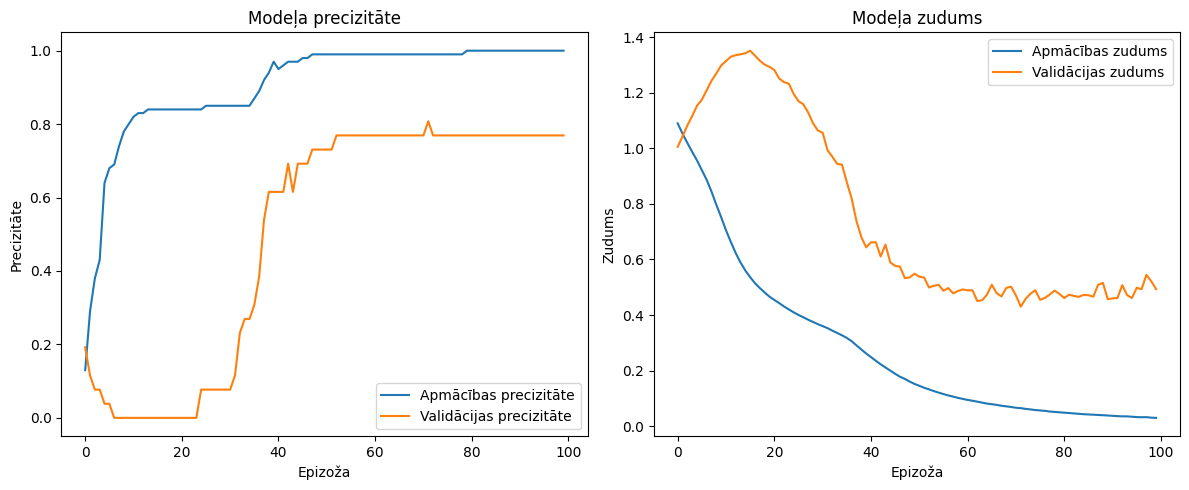

In [12]:

# Apmācības procesa vizualizācija
plt.figure(figsize=(12, 5))

# Apmācības un validācijas precizitāte
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Apmācības precizitāte')
plt.plot(history.history['val_accuracy'], label='Validācijas precizitāte')
plt.title('Modeļa precizitāte')
plt.xlabel('Epizoža')
plt.ylabel('Precizitāte')
plt.legend()

# Apmācības un validācijas zudums
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Apmācības zudums')
plt.plot(history.history['val_loss'], label='Validācijas zudums')
plt.title('Modeļa zudums')
plt.xlabel('Epizoža')
plt.ylabel('Zudums')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')

## VALIDĀCIJAS DATU IELĀDĒŠANA UN PRECIZITĀTES PĀRBAUDE

In [13]:
# Validācijas datu ielāde un precizitātes pārbaude
# Ielādējam validācijas datus
validation_data = pd.read_csv('../input/iris-data/Iris_validate.csv')
print("\nValidācijas datu izmērs:", validation_data.shape)
print("\nValidācijas datu pirmās 5 rindas:")
print(validation_data.head())

# Sagatvojam validācijas datus modelim
X_val = validation_data.drop('Species', axis=1).values
y_val = validation_data['Species'].values

# Kodējam validācijas datu mērķa mainīgo (sugas)
y_val_encoded = label_encoder.transform(y_val)
y_val_onehot = keras.utils.to_categorical(y_val_encoded, num_classes=3)

# Standartizējam validācijas datu pazīmes (features)
X_val_scaled = scaler.transform(X_val)

# Veicam prognozes ar neironu tīklu
y_pred_prob = model.predict(X_val_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Dekodējam prognozētās klases atpakaļ uz sugu nosaukumiem
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Izvadām klasifikācijas rezultātus
print("\nNeironu tīkla klasifikācijas precizitāte:", 
      accuracy_score(y_val_encoded, y_pred))
print("\nKlasifikācijas atskaite:")
print(classification_report(y_val_encoded, y_pred, 
                           target_names=label_encoder.classes_))


Validācijas datu izmērs: (12, 5)

Validācijas datu pirmās 5 rindas:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
0            4.4           3.2            1.3           0.2      Iris-setosa
1            5.0           3.5            1.6           0.6      Iris-setosa
2            5.1           3.8            1.9           0.4      Iris-setosa
3            4.8           3.0            1.4           0.3      Iris-setosa
4            5.8           2.6            4.0           1.2  Iris-versicolor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Neironu tīkla klasifikācijas precizitāte: 1.0

Klasifikācijas atskaite:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       1.00      1.00      1.00         4
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        12
      macro avg       1.00      1.00      1.00        12
   weighted av